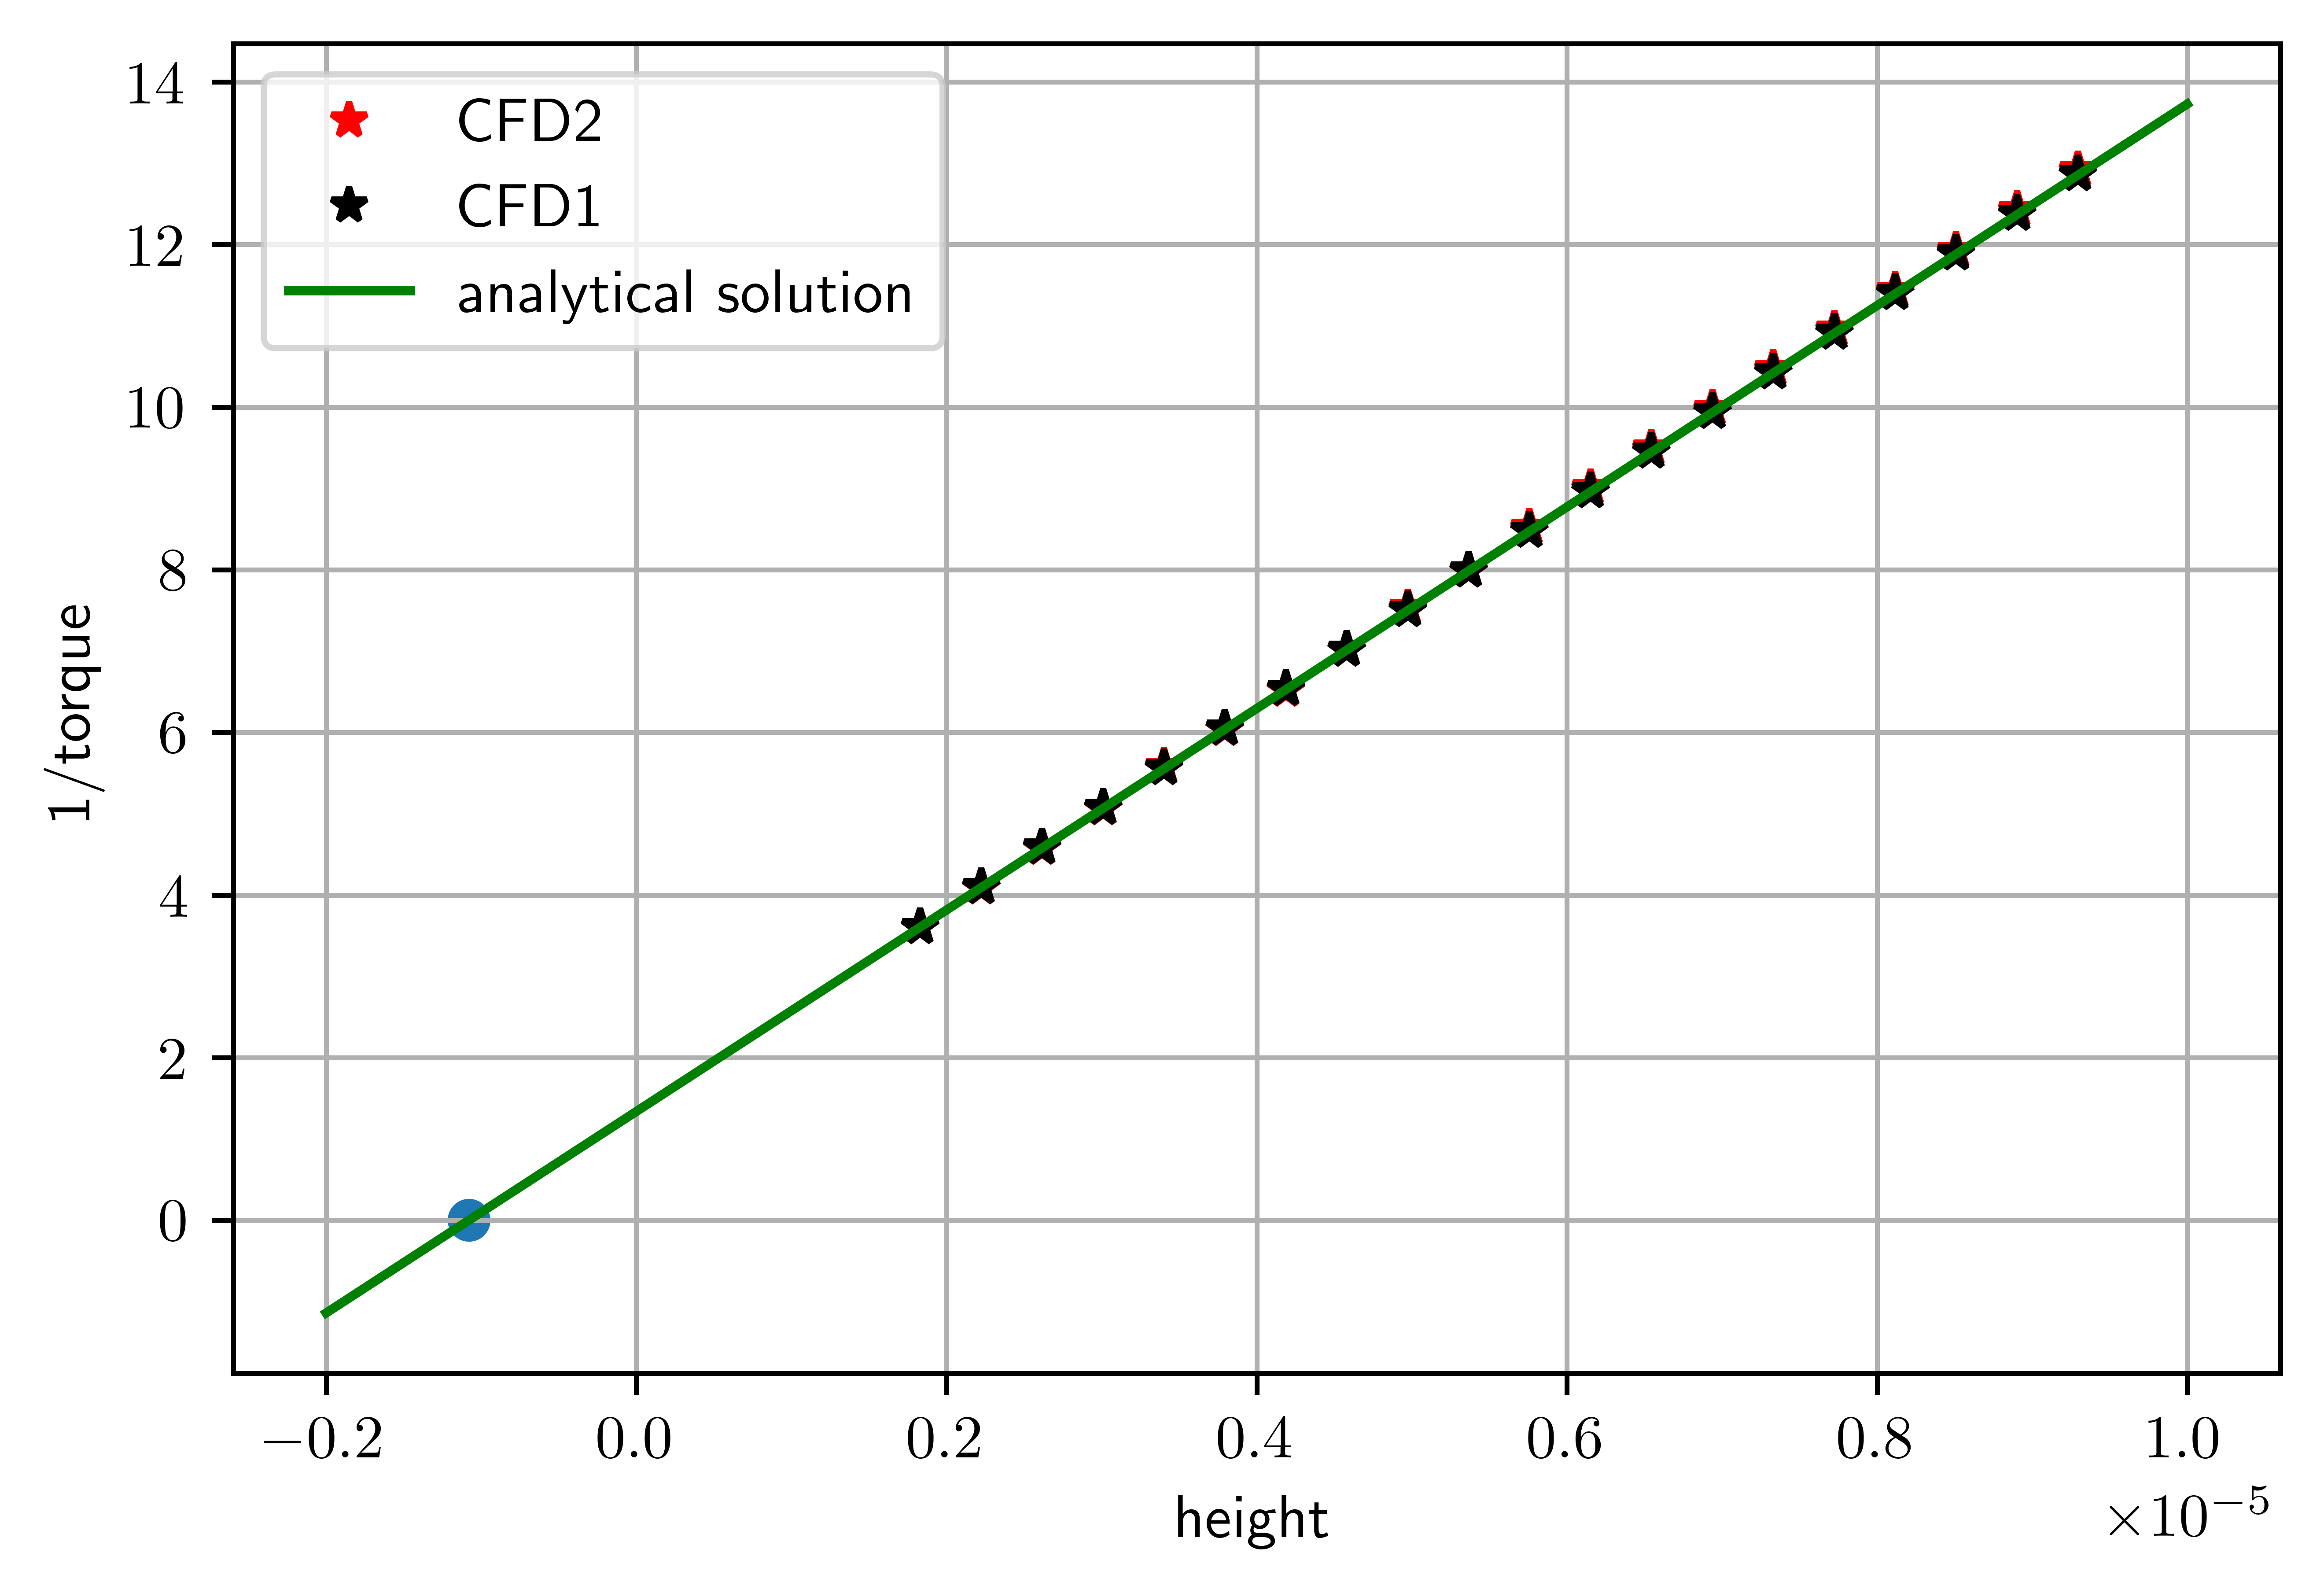

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import csv

rcParams["figure.dpi"] = 1000
rcParams["text.usetex"] = True

post_proc_dir = "../partialSlipStudy/Study/"
ParameterStudies_dir=sorted(os.listdir(post_proc_dir))

#height
CFDheights= np.linspace(1.831e-6, 9.296e-6, 20)
#CFDtorque
CFDtorques=[]
for Parameterstudy_dir in ParameterStudies_dir:
    study_path=os.path.join(post_proc_dir,Parameterstudy_dir)
    data_path=os.path.join(study_path,"postProcessing/forces/0/moment.dat")
    torque = pd.DataFrame(pd.read_csv(data_path ,header=None,skiprows=3,delimiter="\t"))
    CFDtorque=torque[0].str.split(" ")
    CFDtorque=1/(180*float(CFDtorque[len(CFDtorque)-1][-1]))
    CFDtorques=np.append(CFDtorques,CFDtorque)
#exactTorque 
#parameters
height=np.linspace(-2000e-9,10e-6,1000)
R=32e-3
lambdaB=540e-9
lambdaT=540e-9
omega=12.566
mu=0.039
# Define the analytic velocity function
def calc_exact_torque(H,R, lambdaB, lambdaT, omega,mu):
    # TODO(HBG): implement 
    return 1/(np.pi/2*omega*R**4*mu/(H+lambdaB+lambdaT))
exactTorque=[]
for H in height:
    exactTorque=np.append(exactTorque,calc_exact_torque(H, R, lambdaB, lambdaT, omega,mu))
    
###############
### plot 
CFDtorques2=[3.60824634,  4.09537741,  4.58250997,  5.07343699,  5.58134696,  6.04402916,
  6.52979818,  7.02162616,  7.53019578,  7.99548722,  8.51825224,  9.00725576,
  9.4970463,   9.98427397, 10.47543451, 10.95540198, 11.43209225, 11.92580072,
 12.42940625, 12.91922064]
plt.plot(np.transpose(CFDheights),CFDtorques2,'r*',label="CFD2")

plt.plot(np.transpose(CFDheights),CFDtorques,'k*',label="CFD1")
plt.plot(height,exactTorque,'g-',label="analytical solution")
plt.grid()
plt.xlabel("height")
plt.ylabel("1/torque")
plt.legend()
plt.scatter(-lambdaB-lambdaT,0)
